# Webscraping 1

This is lesson 1 of 3 in the educational series on webscraping. This notebook is intended to teach how to scrape Twitter without a Developer Account and introduce the concepts of webscraping. 

**Audience:** Anyone interested in using 

**Use case:** Tutorial, For Learners (Detailed explanation, not ideal for researchers)

**Difficulty:** Intermediate

**Completion time:** 45 minutes

**Knowledge Required:** 

* Basic file operations (open, close, read, write)
* Data cleaning with `Pandas`

**Knowledge Recommended:**
* None

**Learning Objectives:**
After this lesson, learners will be able to:

1. Describe and implement an data ETL pipeline for further analysis/modeling
2. Convert raw Twitter data into structured data for the purpose of further analysis
3. Be familiar with HuggingFace resources for pursuing the topic

**Research Pipeline:**  
* None
___

# Required Python Libraries
- [Pandas](https://pandas.pydata.org/) for manipulating and cleaning data.
- [snscrape](https://github.com/JustAnotherArchivist/snscrape) for collecting social media data
- [Matplotlib](https://pypi.org/project/matplotlib/) for basic visualizations 



# Install Required Libraries

In [1]:
#Install the Libraries
!pip install pandas
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git 
!pip install matplotlib
!pip install wordcloud

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-ve8pjiar
  Running command git clone -q https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-ve8pjiar
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit ed3ea944d177157d688786470c8369198b0ce8ce


In [2]:
# !snscrape --jsonl twitter-hashtag "#podrevday since:2020-01-01 until:2021-11-10" > 'data/jan20_nov21.json'

!mkdir data
#Get the latest 100 results from Twitter with the #shakespeare and save it to a json file
!snscrape --jsonl --max-results 100 twitter-hashtag shakespeare > data/twitter-ht_shakespeare.json

mkdir: cannot create directory ‘data’: File exists


In [3]:
import pandas as pd

#Change the display to view long strings
pd.set_option('display.max_colwidth', None)

path = "data/twitter-ht_shakespeare.json"

df_tweets = pd.read_json(path, lines=True)

In [4]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   _type             100 non-null    object             
 1   url               100 non-null    object             
 2   date              100 non-null    datetime64[ns, UTC]
 3   content           100 non-null    object             
 4   renderedContent   100 non-null    object             
 5   id                100 non-null    int64              
 6   user              100 non-null    object             
 7   replyCount        100 non-null    int64              
 8   retweetCount      100 non-null    int64              
 9   likeCount         100 non-null    int64              
 10  quoteCount        100 non-null    int64              
 11  conversationId    100 non-null    int64              
 12  lang              100 non-null    object             
 13  source

In [5]:
df_tweets.head().T

,0,1,2,3,4
_type,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet
url,https://twitter.com/BlackLawrence/status/1524117170313121798,https://twitter.com/Elin45875883/status/1524117158040686593,https://twitter.com/OneMMonkeys/status/1524116626408456193,https://twitter.com/TortiveTheatre/status/1524116467825844224,https://twitter.com/ElPensanteSv/status/1524115846347608072
date,2022-05-10 20:00:24+00:00,2022-05-10 20:00:21+00:00,2022-05-10 19:58:15+00:00,2022-05-10 19:57:37+00:00,2022-05-10 19:55:09+00:00
content,"""For me, all of language – including the forms we use, as well as the rules of grammar – is politically charged."" Kristina Marie Darling on writing Daylight Has Already Come. Pre-order https://t.co/ncshddJtRt\n#Shakespeare #TragicHeroines #Hybrid #Feminist #Erasure https://t.co/H7bHXjt5xc","""Arama boşuna, bulunmak istemeyeni."" \n//Romeo ve Juliet #shakespeare","If they shall fail, I with mine enemies #shakespeare","Tomorrow night we're bringing our ★★★★★ @edfringe show, Shakespeare's Fool to the fabulous @CORNERSTONEfun. Don't miss out. \n\n#shakespeare #theatre #TouringTheatre \n\nhttps://t.co/nyCLP0Q2vI","¿#SabíasQue #BenitoPérezGaldós sentía verdadera fascinación por autores como #Cervantes, #Shakespeare, #CharlesDickens, #LeónTolstoi o #LopedeVega? https://t.co/aKGcvx5oHP"
renderedContent,"""For me, all of language – including the forms we use, as well as the rules of grammar – is politically charged."" Kristina Marie Darling on writing Daylight Has Already Come. Pre-order ow.ly/K9E350J4gNM\n#Shakespeare #TragicHeroines #Hybrid #Feminist #Erasure https://t.co/H7bHXjt5xc","""Arama boşuna, bulunmak istemeyeni."" \n//Romeo ve Juliet #shakespeare","If they shall fail, I with mine enemies #shakespeare","Tomorrow night we're bringing our ★★★★★ @edfringe show, Shakespeare's Fool to the fabulous @CORNERSTONEfun. Don't miss out. \n\n#shakespeare #theatre #TouringTheatre \n\ncornerstone-arts.org/whats/shakespe…","¿#SabíasQue #BenitoPérezGaldós sentía verdadera fascinación por autores como #Cervantes, #Shakespeare, #CharlesDickens, #LeónTolstoi o #LopedeVega? https://t.co/aKGcvx5oHP"
id,1524117170313121798,1524117158040686593,1524116626408456193,1524116467825844224,1524115846347608072
user,"{'_type': 'snscrape.modules.twitter.User', 'username': 'BlackLawrence', 'id': 67383090, 'displayname': 'Black Lawrence Press', 'description': 'Black Lawrence Press publishes contemporary literature and nonfiction.', 'rawDescription': 'Black Lawrence Press publishes contemporary literature and nonfiction.', 'descriptionUrls': None, 'verified': False, 'created': '2009-08-20T18:23:34+00:00', 'followersCount': 7178, 'friendsCount': 171, 'statusesCount': 8194, 'favouritesCount': 913, 'listedCount': 248, 'mediaCount': 4174, 'location': 'NYC, Pittsburgh', 'protected': False, 'linkUrl': 'https://linktr.ee/blacklawrencepress', 'linkTcourl': 'https://t.co/UIhDQrT1Fn', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/372593938/LOGO_300_dpi_LARGE_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/67383090/1572974125', 'label': None, 'url': 'https://twitter.com/BlackLawrence'}","{'_type': 'snscrape.modules.twitter.User', 'username': 'Elin45875883', 'id': 1281286807343312900, 'displayname': 'inci küpeli kız', 'description': 'sanki asla gerçekleşmeyeceğini bildiğim bir şeyi bekler gibiydim.', 'rawDescription': 'sanki asla gerçekleşmeyeceğini bildiğim bir şeyi bekler gibiydim.', 'descriptionUrls': None, 'verified': False, 'created': '2020-07-09T17:59:37+00:00', 'followersCount': 20, 'friendsCount': 65, 'statusesCount': 191, 'favouritesCount': 320, 'listedCount': 0, 'mediaCount': 15, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1341328878892138496/LLGmKeYZ_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/12812868073

In [6]:
df_tweets.user[0]

{'_type': 'snscrape.modules.twitter.User',
 'username': 'BlackLawrence',
 'id': 67383090,
 'displayname': 'Black Lawrence Press',
 'description': 'Black Lawrence Press publishes contemporary literature and nonfiction.',
 'rawDescription': 'Black Lawrence Press publishes contemporary literature and nonfiction.',
 'descriptionUrls': None,
 'verified': False,
 'created': '2009-08-20T18:23:34+00:00',
 'followersCount': 7178,
 'friendsCount': 171,
 'statusesCount': 8194,
 'favouritesCount': 913,
 'listedCount': 248,
 'mediaCount': 4174,
 'location': 'NYC, Pittsburgh',
 'protected': False,
 'linkUrl': 'https://linktr.ee/blacklawrencepress',
 'linkTcourl': 'https://t.co/UIhDQrT1Fn',
 'profileImageUrl': 'https://pbs.twimg.com/profile_images/372593938/LOGO_300_dpi_LARGE_normal.jpg',
 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/67383090/1572974125',
 'label': None,
 'url': 'https://twitter.com/BlackLawrence'}

In [7]:
!snscrape twitter-user --help
# https://github.com/JustAnotherArchivist/snscrape/blob/master/README.md

usage: snscrape twitter-user [-h] [--user-id] user

positional arguments:
  user        A Twitter username (without @)

optional arguments:
  -h, --help  show this help message and exit
  --user-id   Use user ID instead of username (default: False)


In [8]:
# !snscrape --jsonl --max-results 100 twitter-hashtag shakespeare > data/twitter-ht_shakespeare.json
!snscrape --jsonl --max-results 100 twitter-user pevansimpson > data/evan.json

In [9]:
df_evan = pd.read_json('data/evan.json', lines=True)

In [10]:
df_evan.head().T

,0,1,2,3,4
_type,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet
url,https://twitter.com/pevansimpson/status/1477717437571383300,https://twitter.com/pevansimpson/status/1462154135663529984,https://twitter.com/pevansimpson/status/1457723966102114318,https://twitter.com/pevansimpson/status/1455262139346788367,https://twitter.com/pevansimpson/status/1418974440898052105
date,2022-01-02 19:04:26+00:00,2021-11-20 20:21:26+00:00,2021-11-08 14:57:31+00:00,2021-11-01 19:55:06+00:00,2021-07-24 16:40:44+00:00
content,"My recent post in @TDataScience where I list, in order, what books to work through (you can't just read them) to learn #NLP.\n\nhttps://t.co/8Q2CcItQL0 #DataScience","If you're looking for icons for your cv or presentation, check this site out: &lt;div&gt;Icons made by &lt;a href=""https://t.co/uGxi736b4v"" title=""Freepik""&gt;Freepik&lt;/a&gt; from &lt;a href=""https://t.co/v7mk10j47w"" title=""Flaticon""&gt;https://t.co/YRXES8Jc6E&lt;/a&gt;&lt;/div&gt;",I'm attending Open Source Office Hours. Would you like to attend? https://t.co/tWOWL73F7J @huggingface #NLP,"Interesting presentation on how @Duolingo uses #NLP for both the app and the @DuolingoENTest at ""An Inside View of NLP at Duolingo"" https://t.co/OGRNlNIIMG @Eventbrite",@penguinusa 1984
renderedContent,"My recent post in @TDataScience where I list, in order, what books to work through (you can't just read them) to learn #NLP.\n\ntowardsdatascience.com/books-for-lear… #DataScience","If you're looking for icons for your cv or presentation, check this site out: &lt;div&gt;Icons made by &lt;a href=""freepik.com"" title=""Freepik""&gt;Freepik&lt;/a&gt; from &lt;a href=""flaticon.com"" title=""Flaticon""&gt;flaticon.com&lt;/a&gt;&lt;/div&gt;",I'm attending Open Source Office Hours. Would you like to attend? linkedin.com/video/event/ur… @huggingface #NLP,"Interesting presentation on how @Duolingo uses #NLP for both the app and the @DuolingoENTest at ""An Inside View of NLP at Duolingo"" eventbrite.com/e/an-inside-vi… @Eventbrite",@penguinusa 1984
id,1477717437571383300,1462154135663529984,1457723966102114318,1455262139346788367,1418974440898052105
user,"{'_type': 'snscrape.modules.twitter.User', 'username': 'pevansimpson', 'id': 230954247, 'displayname': 'Evan Simpson', 'description': 'Husband, #datascientist, and #bjj geek.', 'rawDescription': 'Husband, #datascientist, and #bjj geek.', 'descriptionUrls': None, 'verified': False, 'created': '2010-12-27T05:14:41+00:00', 'followersCount': 422, 'friendsCount': 1043, 'statusesCount': 1565, 'favouritesCount': 727, 'listedCount': 31, 'mediaCount': 48, 'location': 'Tirana', 'protected': False, 'linkUrl': 'https://educatorsrlearners.github.io/an-a-z-of-machine-learning/', 'linkTcourl': 'https://t.co/xIoZ0qZ6oy', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/453387820497793024/9zJ3BD_C_normal.jpeg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/230954247/1580324293', 'label': None, 'url': 'https://twitter.com/pevansimpson'}","{'_type': 'snscrape.modules.twitter.User', 'username': 'pevansimpson', 'id': 230954247, 'displayname': 'Evan Simpson', 'description': 'Husband, #datascientist, and #bjj geek.', 'rawDescription': 'Husband, #datascientist, and #bjj geek.', 'descriptionUrls': None, 'verified': False, 'created': '2010-12-27T05:14:41+00:00', 'followersCount': 422, 'friendsCount': 1043, 'statusesCount': 1565, 'favouritesCount': 727, 'listedCount': 31, 'mediaCount': 48, 'location': 'Tirana', 'protected': False, 'linkUrl': 'https://educatorsrlearners.github.io/an-a-z-of-machine-learning/', 'linkTcourl': 'https://t.co/xIoZ0qZ6oy', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/453387820497793024/9zJ3BD_C_normal.jpeg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/230954247/1580324293', 'label': None, 'url': 'https://twitter.com/pevansimpson'}","{'_type': 'snscrape.modules.twitter.U

In [11]:
# !snscrape --jsonl twitter-hashtag "#podrevday since:2020-01-01 until:2021-11-10" > 'data/jan20_nov21.json'
!snscrape --jsonl --max-results 100  twitter-hashtag "#MAGA since:2020-01-06 until:2020-01-07"> "data/insurection.json"


In [12]:
df_insurection = pd.read_json('data/insurection.json', lines=True)
df_insurection.head().T

,0,1,2,3,4
_type,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet
url,https://twitter.com/Ow_My_Back_/status/1214335703762358272,https://twitter.com/bman630/status/1214335688252018688,https://twitter.com/FormerGOPer/status/1214335627694608384,https://twitter.com/pixiedid/status/1214335606383362048,https://twitter.com/bombast47876007/status/1214335593058127874
date,2020-01-06 23:59:27+00:00,2020-01-06 23:59:24+00:00,2020-01-06 23:59:09+00:00,2020-01-06 23:59:04+00:00,2020-01-06 23:59:01+00:00
content,@realDonaldTrump Today would be a good day for @realDonaldTrump to resign\n\nHere’s hoping that every single one of you red cap wearing #MAGA supporters are currently in a lineup outside your local US Army recruiting office\n#MAGAEnlist https://t.co/0TIybKnTR9,@RegisteredText @TeriLentz1 @USNurseSkipper @luzianalady @daverich503 @TudorCityLady @VickiMDonovan @JessicaKAGMAGA @RNinMI @gghansen58 @gramMrotzek @CareyLou114 @johngault071 @uhvgottabkiddin @TurnCaliRed2020 @Carolyncorneli8 @runforthehouse I will follow all please return the follow. \nTime to unite! @bman630 \nThank you.\n#Trump2020 #QAnons #MAGA #KAG,"Hey @realDonaldTrump, remember this? This is why @HillaryClinton out voted you by 3 Million votes. Imagine how much better of we'd be had she been given her rightful victory. But like your #SCOTUS pick, not everything is earned.\n\n@GOP @DNC #Resist #MAGA @senatemajldr https://t.co/MndaJ4LhGy",Wait. According to @RealDonaldTrump we’ve wiped ISIS from the face of the earth!How can we still be fighting them? Anyone? #MAGA #MAGATS #KAG #KAG2020 \n\nU.S.-Led Coalition Halts ISIS Fight as It Steels for Iranian Attacks – The Seattle Times https://t.co/vrvTp8V13Z,Fucking nonsense. The #IranCrisis is trump caused and as result of yet another; 1 foreign policy blunder OR 2 another instance of trump setting up #MPutinGA to take over. trump is existential danger to US Get rid of him now. #FairSenateTrial @GOP #MAGA #Trump2020 https://t.co/3MnSCAhvGK
renderedContent,@realDonaldTrump Today would be a good day for @realDonaldTrump to resign\n\nHere’s hoping that every single one of you red cap wearing #MAGA supporters are currently in a lineup outside your local US Army recruiting office\n#MAGAEnlist https://t.co/0TIybKnTR9,@RegisteredText @TeriLentz1 @USNurseSkipper @luzianalady @daverich503 @TudorCityLady @VickiMDonovan @JessicaKAGMAGA @RNinMI @gghansen58 @gramMrotzek @CareyLou114 @johngault071 @uhvgottabkiddin @TurnCaliRed2020 @Carolyncorneli8 @runforthehouse I will follow all please return the follow. \nTime to unite! @bman630 \nThank you.\n#Trump2020 #QAnons #MAGA #KAG,"Hey @realDonaldTrump, remember this? This is why @HillaryClinton out voted you by 3 Million votes. Imagine how much better of we'd be had she been given her rightful victory. But like your #SCOTUS pick, not everything is earned.\n\n@GOP @DNC #Resist #MAGA @senatemajldr twitter.com/jensimmons/sta…",Wait. According to @RealDonaldTrump we’ve wiped ISIS from the face of the earth!How can we still be fighting them? Anyone? #MAGA #MAGATS #KAG #KAG2020 \n\nU.S.-Led Coalition Halts ISIS Fight as It Steels for Iranian Attacks – The Seattle Times seattletimes.com/nation-world/u…,Fucking nonsense. The #IranCrisis is trump caused and as result of yet another; 1 foreign policy blunder OR 2 another instance of trump setting up #MPutinGA to take over. trump is existential danger to US Get rid of him now. #FairSenateTrial @GOP #MAGA #Trump2020 twitter.com/RepDougCollins…
id,1214335703762358272,1214335688252018688,1214335627694608384,1214335606383362048,1214335593058127874
user,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Ow_My_Back_', 'id': 2341257349, 'displayname': 'Chris Loewen ♿️🇺🇦', 'description': 'Just a retired disabled 🇨🇦 guy living with chronic pain from a degenerative lumbar spine and arthritis. ☕️ Coffee, Cannabis and Cats 👉NO DM’s👈 🇺🇦', 'rawDescription': '

In [13]:
df_insurection = pd.read_json('data/insurection.json', lines=True)

In [14]:
df_insurection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   _type             100 non-null    object             
 1   url               100 non-null    object             
 2   date              100 non-null    datetime64[ns, UTC]
 3   content           100 non-null    object             
 4   renderedContent   100 non-null    object             
 5   id                100 non-null    int64              
 6   user              100 non-null    object             
 7   replyCount        100 non-null    int64              
 8   retweetCount      100 non-null    int64              
 9   likeCount         100 non-null    int64              
 10  quoteCount        100 non-null    int64              
 11  conversationId    100 non-null    int64              
 12  lang              100 non-null    object             
 13  source

In [15]:
df_insurection.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'card'],
      dtype='object')

In [16]:
df_insurection.loc[1, ['date', 'content', 'user', 'replyCount', 'retweetCount', 'likeCount']]

date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [17]:
df_insurection.loc[:, 'date'].tail()

95   2020-01-06 23:33:30+00:00
96   2020-01-06 23:33:27+00:00
97   2020-01-06 23:32:54+00:00
98   2020-01-06 23:32:52+00:00
99   2020-01-06 23:32:30+00:00
Name: date, dtype: datetime64[ns, UTC]

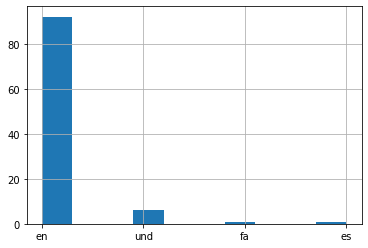

In [18]:
df_insurection.loc[:, 'lang'].hist();

In [19]:
pd.set_option('display.max_colwidth', None)
df_insurection.loc[df_insurection['lang']=='es', 'content']


73    #Border Crisis\n\n.@Medium #medium #blog #essay #news #politics #government #capitalism #socialism #borders #immigration #mexico #usa #illegals #wall #trump #democrats #republicans #gop #maga #americafirst #buildthewall #draintheswamp #children\nhttps://t.co/XVFUICQS2N
Name: content, dtype: object

# Next Steps


## Create a Word Cloud

Refer back to this [tutorial](https://constellate.org/tutorials/exploring-word-frequencies) for how creating Word Clouds

## Sentiment Analysis with Vader
See this [tutorial](https://constellate.org/tutorials/sentiment-analysis-with-vader) for step-by-step insructions on using Vader for sentiment analysis 

In [48]:
!snscrape --jsonl --since 2020-01-06  twitter-search "#MAGA --until:2020-01-07 lang:es"> "data/insurection_sp.json"

#https://github.com/igorbrigadir/twitter-advanced-search

In [50]:
df_sp = pd.read_json('data/insurection_sp.json', lines=True)
df_sp.head().T

,0,1,2,3,4
_type,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet
url,https://twitter.com/chrisoldcorn/status/1214331401245462529,https://twitter.com/12mgray/status/1214325493627072514,https://twitter.com/thingstrumpsay/status/1214324520879886339,https://twitter.com/Stelita011/status/1214308334175698950,https://twitter.com/12mgray/status/1214303947097288706
date,2020-01-06 23:42:21+00:00,2020-01-06 23:18:53+00:00,2020-01-06 23:15:01+00:00,2020-01-06 22:10:42+00:00,2020-01-06 21:53:16+00:00
content,#Border Crisis\n\n.@Medium #medium #blog #essay #news #politics #government #capitalism #socialism #borders #immigration #mexico #usa #illegals #wall #trump #democrats #republicans #gop #maga #americafirst #buildthewall #draintheswamp #children\nhttps://t.co/XVFUICQS2N,Soleimani death silences Iran deal partner\n\nhttps://t.co/0aVpIXL3lZ\n\n#POTUS45 #qanon #KAG #ImpeachmentHoax #MAGA #MAGA2020 #Spygate #Ukraine #FISAabuse #Soleimani #FISAGate,VOTE IN 2018!! #draintheswamp #MAGA,"@GuerreroCuba De estos delincuentes terroristas está lleno sur América y el Caribe, como VENECUBA! Tienen secuestrados países completos que desean ser liberados, lloran están de duelo se les fue uno de sus líderes. \n#MAGA will #KAG \n@realDonaldTrump 2020",Soleimani death silences Iran deal partner\n\nhttps://t.co/0aVpIXL3lZ\n\n#POTUS45 #qanon #KAG #ImpeachmentHoax #MAGA #MAGA2020 #Spygate #Ukraine #FISAabuse #Soleimani #FISAGate
renderedContent,#Border Crisis\n\n.@Medium #medium #blog #essay #news #politics #government #capitalism #socialism #borders #immigration #mexico #usa #illegals #wall #trump #democrats #republicans #gop #maga #americafirst #buildthewall #draintheswamp #children\nmedium.com/dialogue-and-d…,Soleimani death silences Iran deal partner\n\ngrayseconomy.com/2020/01/06/sol…\n\n#POTUS45 #qanon #KAG #ImpeachmentHoax #MAGA #MAGA2020 #Spygate #Ukraine #FISAabuse #Soleimani #FISAGate,VOTE IN 2018!! #draintheswamp #MAGA,"@GuerreroCuba De estos delincuentes terroristas está lleno sur América y el Caribe, como VENECUBA! Tienen secuestrados países completos que desean ser liberados, lloran están de duelo se les fue uno de sus líderes. \n#MAGA will #KAG \n@realDonaldTrump 2020",Soleimani death silences Iran deal partner\n\ngrayseconomy.com/2020/01/06/sol…\n\n#POTUS45 #qanon #KAG #ImpeachmentHoax #MAGA #MAGA2020 #Spygate #Ukraine #FISAabuse #Soleimani #FISAGate
id,1214331401245462529,1214325493627072514,1214324520879886339,1214308334175698950,1214303947097288706
user,"{'_type': 'snscrape.modules.twitter.User', 'username': 'chrisoldcorn', 'id': 9019142, 'displayname': 'Christopher Oldcorn', 'description': 'Journalist @WSOnlineNews', 'rawDescription': 'Journalist @WSOnlineNews', 'descriptionUrls': None, 'verified': False, 'created': '2007-09-21T18:02:13+00:00', 'followersCount': 3061, 'friendsCount': 4985, 'statusesCount': 144704, 'favouritesCount': 8331, 'listedCount': 168, 'mediaCount': 7977, 'location': '', 'protected': False, 'linkUrl': 'https://westernstandardonline.com/author/christopher-oldcorn/', 'linkTcourl': 'https://t.co/2ke2UpjsJU', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1506282995359039490/fIPYOe9w_normal.png', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/9019142/1647973863', 'label': None, 'url': 'https://twitter.com/chrisoldcorn'}","{'_type': 'snscrape.modules.twitter.User', 'username': '12mgray', 'id': 368563306, 'displayname': 'Michael Gray', 'description': 'Business journalist and blogger at Grayseconomy.com', 'rawDescription': 'Business journalist and blogger at https://t.co/eq5T8BmqKh', 'descriptionUrls': [{'text': 'Grayseconomy.com', 'url': 'http://Grayseconomy.com', 'tcourl': 'https://t.co/eq5T8BmqKh', 'indices': [35, 58]}], 'verified': False, 'created': '2011-09-05T21:02:03+00:00', 'followersCount': 776, 'friendsCount': 371, 'statusesCount': 12579, 'favouritesCount': 4441, 'listedCount': 44, 'med

In [38]:
df_insurection.loc[df_insurection["lang"]=='sp', :]

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card
